In [ ]:
import zipfile
import os
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO
import random

# Path to the ZIP file containing font files
zip_file_path = "/content/TP_5 (3).zip"

# Define labels for the digits in Khmer script
labels = ['១', '២', '៣', '៤', '៥', '៦', '៧', '៨', '៩', '០',
          "ក", "ខ", "គ", "ឃ", "ង", "ច", "ឆ", "ជ", "ឈ", "ញ",
          "ដ", "ឋ", "ឌ", "ឍ", "ណ", "ត", "ថ", "ទ", "ធ", "ន",
          "ប", "ផ", "ព", "ភ", "ម", "យ", "រ", "ល", "វ", "ឝ",
          "ឞ", "ស", "ហ", "ឡ", "អ", 'ឣ', 'ឤ', 'ឥ', 'ឦ', 'ឧ',
          'ឨ', 'ឩ', 'ឪ', 'ឫ', 'ឬ', 'ឭ', 'ឮ', 'ឯ', 'ឰ', 'ឱ',
          'ឲ', 'ឳ', 'ា', 'ិ', 'ី', 'ឹ', 'ឺ', 'ុ', 'ូ', 'ួ',
          'ើ', 'ឿ', 'ៀ', 'េ', 'ែ', 'ៃ', 'ោ', 'ៅ', 'ំ', 'ះ',
          'ៈ', '៉', '៊', '់', '៌', '៍', '៎', '៏', '័', '៑',
          '្', '៓', '។', '៕', '៖', 'ៗ', '៘', '៙', '៚', '៛',]

# Create a folder to save generated images
output_folder = "labels"
os.makedirs(output_folder, exist_ok=True)  # Ensure the output folder exists

# Image parameters
image_width, image_height = 28, 28    # Size of each image
font_size = 12

# Open the ZIP file and create individual images
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    font_files = [f for f in zip_ref.namelist() if f.endswith('.ttf')]

    generated_images = set()  # Use a set to keep track of generated image filenames

    while len(generated_images) < 10100:
        label = random.choice(labels)
        font_file = random.choice(font_files)
        rotation_angle = random.randint(-10, 10)  # Random rotation angle between -10 and 10 degrees

        with zip_ref.open(font_file) as font_data:
            font = ImageFont.truetype(BytesIO(font_data.read()), font_size)

            # Calculate the position to center the text in the image
            text_width, text_height = font.getsize(label)
            text_x = (image_width - text_width) // 2
            text_y = (image_height - text_height) // 2

            # Create an image for the current label and font with random rotation
            image = Image.new('L', (image_width, image_height), color=0)  # White background
            draw = ImageDraw.Draw(image)
            draw.text((text_x, text_y), label, font=font, fill=225)  # Black text at center
            rotated_image = image.rotate(rotation_angle)  # Rotate the image

            # Generate a unique filename using label, font index, and rotation angle
            image_filename = f"{label}_{font_files.index(font_file)}_{rotation_angle}.png"

            # Check if the filename already exists in the set
            if image_filename not in generated_images:
                # Save the rotated image and add the filename to the set
                rotated_image.save(os.path.join(output_folder, image_filename))
                generated_images.add(image_filename)

print(f"Generated {len(generated_images)} unique images.")


<ipython-input-113-6f57ffe4c954>:45: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  text_width, text_height = font.getsize(label)


Generated 10100 unique images.


In [ ]:
import os
import csv
import numpy as np
from PIL import Image

# Path to the folder containing the generated images
image_folder = "labels"

# Create a list to store the image data and labels
image_data = []
labels = []

# Loop through the images and extract the data
for filename in os.listdir(image_folder):
    if filename.endswith(".png"):
        # Load the image
        image_path = os.path.join(image_folder, filename)
        image = Image.open(image_path)

        # Convert the image to a numpy array and flatten it
        image_array = np.array(image).flatten()

        # Extract the label from the filename
        label = filename.split("_")[0]

        # Add the image data and label to the lists
        image_data.append(image_array)
        labels.append(label)

# Expand the image data to have 10100 rows
while len(image_data) < 10000:
    image_data.extend(image_data)
    labels.extend(labels)

# Truncate the image data and labels to 10100 rows
image_data = image_data[:10100]
labels = labels[:10100]

# Write the data to a CSV file
with open("images1.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["label"] + [f"pixel_{i}" for i in range(784)])  # 784 pixels (28x28)
    for i in range(len(image_data)):
        row = [labels[i]] + list(image_data[i])
        writer.writerow(row)

In [ ]:
import pandas as pd
df = pd.read_csv("/content/images1.csv")
df

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,ហ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ឞ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,៚,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,៑,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ិ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10095,ស,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10096,ត,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10097,៤,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10098,៣,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
 #Check for duplicate rows
print(df.duplicated().sum())

1917


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

# Check if duplicates were removed
print(df.duplicated().sum())

0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 6019 (\N{KHMER LETTER KHO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 6016 (\N{KHMER LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 6018 (\N{KHMER LETTER KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


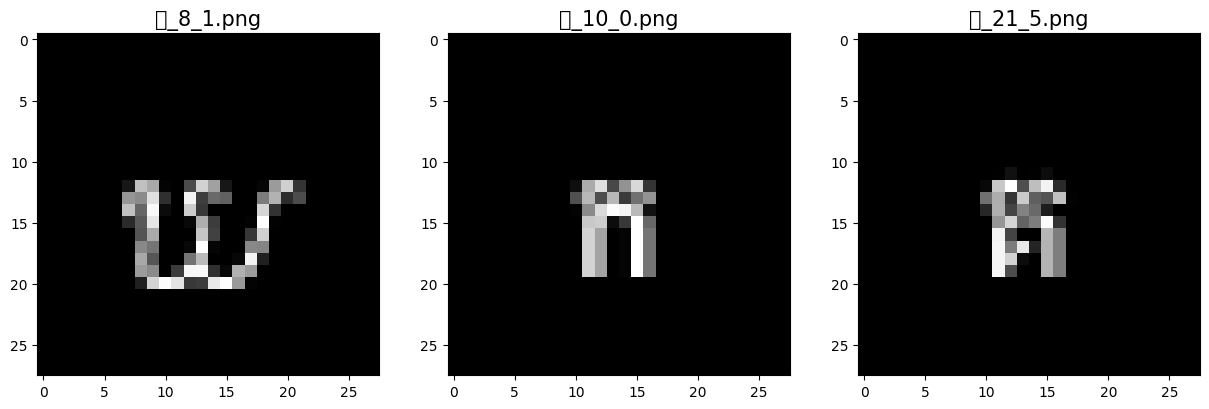

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the paths to the image files
image_paths = [
    "/content/labels/ឃ_8_1.png",
    "/content/labels/ក_10_0.png",
    "/content/labels/គ_21_5.png"
]

# Create a figure with subplots to display the images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Loop through the image paths and display each image
for i, image_path in enumerate(image_paths):
    if not os.path.isfile(image_path):
        print(f"The specified image file {image_path} does not exist.")
        axs[i].axis('off')  # Hide the axis for missing images
    else:
        # Load the image
        image = Image.open(image_path)

        # Display the image
        axs[i].imshow(image, cmap='gray')
        axs[i].axis()  # Hide the axis
        axs[i].set_title(os.path.basename(image_path), fontsize=15)  # Show only the filename as the title

# Show the plot
plt.show()


In [ ]:
# Assume 'label' is the target variable
X = df.drop(columns=['label'])  # Features
y = df['label']  # Target variable

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
# Separate features and target variable
X = df.drop(columns=['label'])  # Features
y = df['label']  # Target variable

# Encode the target variable to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)




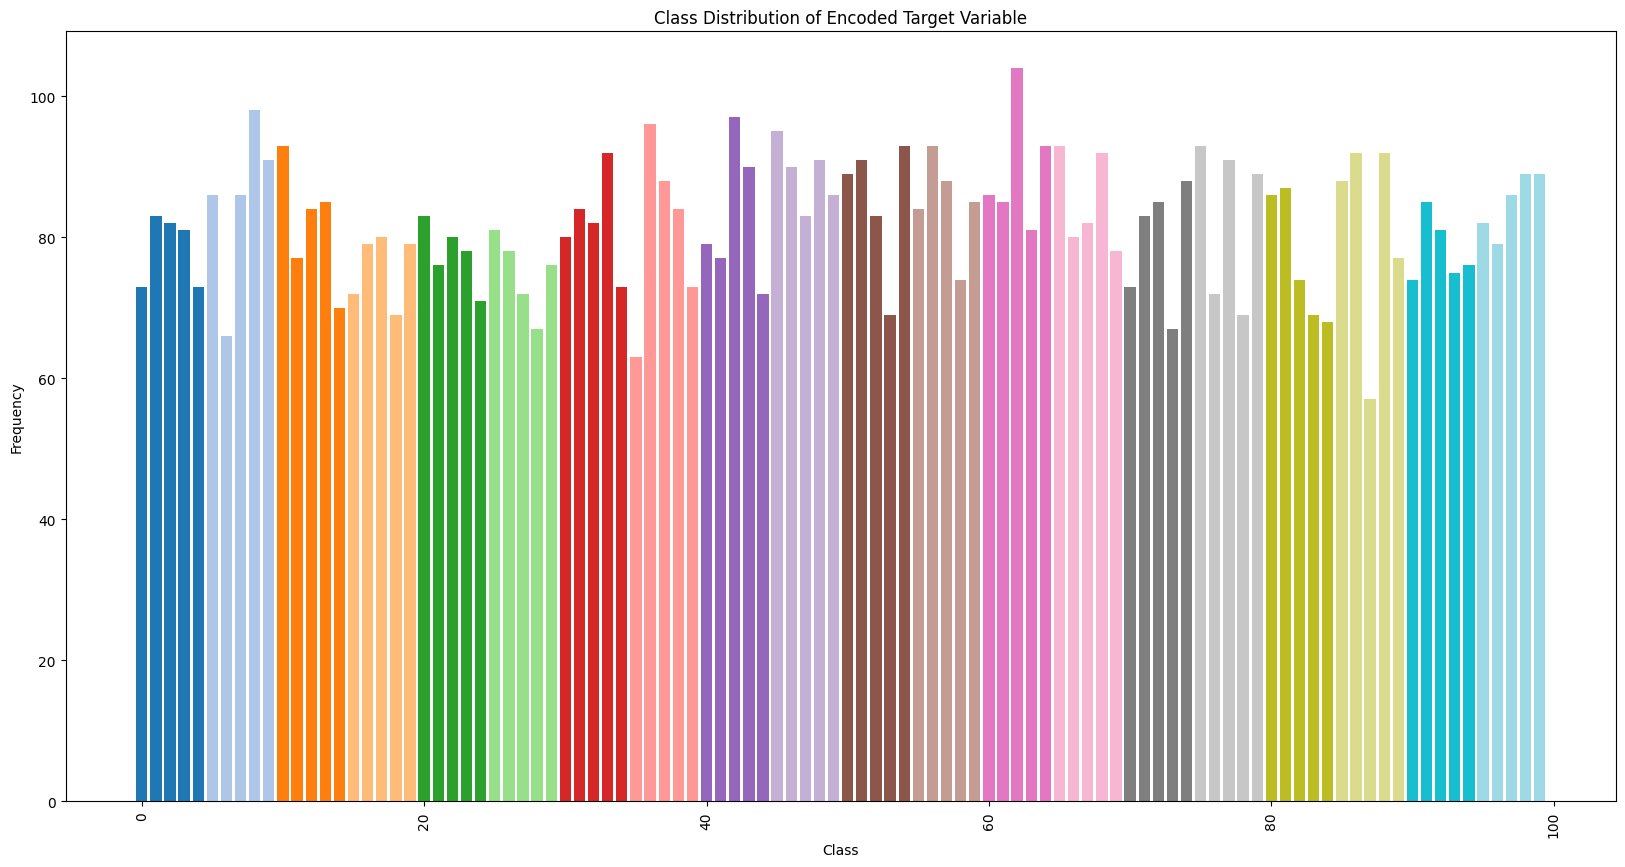

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a color map with 100 distinct colors
cmap = plt.get_cmap("tab20", 100)  # You can choose other colormaps like "tab20", "viridis", etc.

# Plot the class distribution of the original encoded labels
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
class_counts = pd.Series(y_encoded).value_counts().sort_index()
bars = plt.bar(class_counts.index, class_counts.values, color=[cmap(i) for i in range(100)])

# Set title and labels
plt.title('Class Distribution of Encoded Target Variable')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:

from imblearn.over_sampling import SMOTE

# Balance the classes using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# One-hot encode the numeric labels
one_hot_encoder = OneHotEncoder(sparse=False)
y_one_hot = one_hot_encoder.fit_transform(y_resampled.reshape(-1, 1))

# Step 1: Split into training set (60%) and temporary set (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_one_hot, test_size=0.4, random_state=42, stratify=y_resampled)

# Step 2: Split the temporary set into validation set (20%) and test set (20%)
y_temp_labels = y_temp.argmax(axis=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp_labels)

# Verify the size of each set
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training set size: 6240
Validation set size: 2080
Test set size: 2080


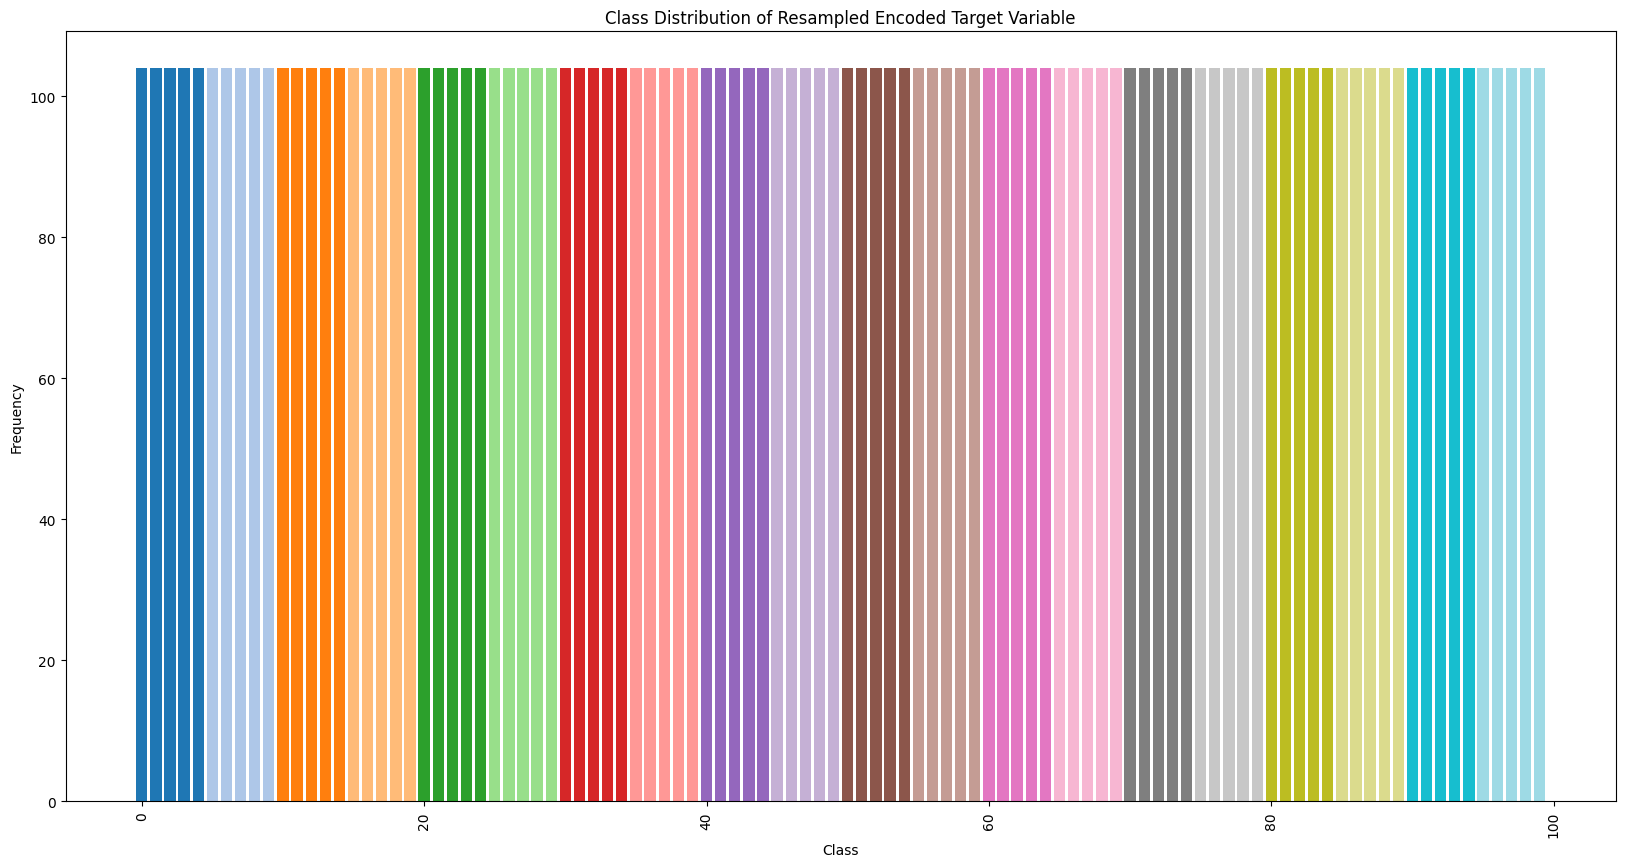

In [ ]:
# Create a color map with 100 distinct colors
cmap = plt.get_cmap("tab20", 100)  # You can choose other colormaps like "tab20", "viridis", etc.

# Plot the class distribution of the resampled encoded labels
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
class_counts_resampled = pd.Series(y_resampled).value_counts().sort_index()
bars = plt.bar(class_counts_resampled.index, class_counts_resampled.values, color=[cmap(i) for i in range(100)])

# Set title and labels
plt.title('Class Distribution of Resampled Encoded Target Variable')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# Normalize the features (pixel values between 0 and 1)
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0


In [ ]:
# Convert DataFrames to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader for each set
batch_size = 70
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
y_train.shape[1]

100

In [ ]:
X_train.shape[1]

784

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 100)
        self.bn3 = nn.BatchNorm1d(100)  # Optional, depending on whether you want to normalize the output layer

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.bn3(self.fc3(x))
        return torch.softmax(x, dim=1)




In [ ]:
# Instantiate the model
model = SimpleNN()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 500
best_val_accuracy = 0
best_model = None

for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, torch.argmax(labels, dim=1))
        loss.backward()
        optimizer.step()

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, torch.argmax(labels, dim=1))
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == torch.argmax(labels, dim=1)).sum().item()

    val_accuracy = correct / total

    # Print results every 100 epochs
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss/len(val_loader)}, Validation Accuracy: {val_accuracy}")

    # Save the best model based on validation accuracy
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_model = model.state_dict()

Epoch 50/500, Validation Loss: 3.8192625125249227, Validation Accuracy: 0.8206730769230769
Epoch 100/500, Validation Loss: 3.803644148508708, Validation Accuracy: 0.8302884615384616
Epoch 150/500, Validation Loss: 3.803762102127075, Validation Accuracy: 0.8278846153846153
Epoch 200/500, Validation Loss: 3.794980454444885, Validation Accuracy: 0.8384615384615385
Epoch 250/500, Validation Loss: 3.795961777369181, Validation Accuracy: 0.8350961538461539
Epoch 300/500, Validation Loss: 3.79893167813619, Validation Accuracy: 0.83125
Epoch 350/500, Validation Loss: 3.79834946791331, Validation Accuracy: 0.8322115384615385
Epoch 400/500, Validation Loss: 3.800099476178487, Validation Accuracy: 0.8293269230769231
Epoch 450/500, Validation Loss: 3.794218413035075, Validation Accuracy: 0.833173076923077
Epoch 500/500, Validation Loss: 3.79592813650767, Validation Accuracy: 0.8326923076923077


In [ ]:
# Testing loop
model.eval()
test_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, torch.argmax(labels, dim=1))
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == torch.argmax(labels, dim=1)).sum().item()

test_accuracy = correct / total
print(f"Test Loss: {test_loss/len(test_loader)}, Test Accuracy: {test_accuracy}")

Test Loss: 3.8010167042414347, Test Accuracy: 0.8269230769230769


## **scikit learn**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Assume df is the dataframe containing your data with 'label' as the target column
# df = pd.read_csv('your_dataset.csv')

# Separate features and target variable
X = df.drop(columns=['label'])  # Features
y = df['label']  # Target variable

# Encode the target variable to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Balance the classes using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# Split into training set (60%), validation set (20%), and test set (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=42, stratify=y_resampled)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Normalize the features (pixel values between 0 and 1)
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Create and train the MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(512,128,32), max_iter=100000, random_state=42)
mlp_clf.fit(X_train, y_train)

# Evaluate the model on validation set
val_preds = mlp_clf.predict(X_val)
val_accuracy = accuracy_score(y_val, val_preds)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Display classification report for validation set
print("Classification Report on Validation Set:")
print(classification_report(y_val, val_preds))

# Evaluate the model on test set
test_preds = mlp_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Display classification report for test set
print("Classification Report on Test Set:")
print(classification_report(y_test, test_preds))


Validation Accuracy: 0.8029
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.59      0.95      0.73        21
           1       1.00      0.76      0.86        21
           2       0.61      0.52      0.56        21
           3       0.94      0.76      0.84        21
           4       0.95      0.90      0.92        20
           5       0.86      0.90      0.88        20
           6       0.79      0.71      0.75        21
           7       0.86      0.86      0.86        21
           8       0.81      0.81      0.81        21
           9       1.00      0.90      0.95        20
          10       1.00      0.81      0.89        21
          11       1.00      0.85      0.92        20
          12       0.85      0.81      0.83        21
          13       0.88      0.67      0.76        21
          14       0.81      0.81      0.81        21
          15       0.80      0.80      0.80        20
          16

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Predicted label: គ


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 6018 (\N{KHMER LETTER KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


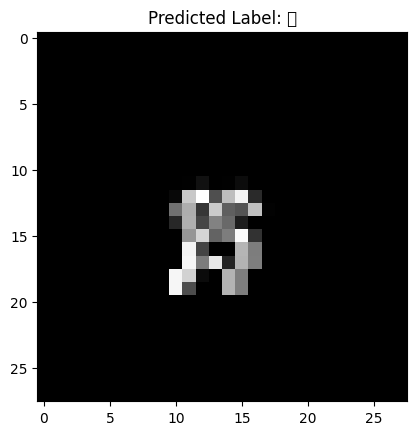

In [ ]:
import matplotlib.pyplot as plt

image_path = '/content/labels/គ_21_-7.png'
image = Image.open(image_path).resize((28, 28)).convert('L')
image_array = np.array(image) / 255.0
image_flattened = image_array.reshape(1, -1)

predicted_label = mlp_clf.predict(image_flattened)
predicted_class = label_encoder.inverse_transform(predicted_label)[0]

print(f"Predicted label: {predicted_class}")
plt.imshow(image, cmap='gray')
plt.title(f'Predicted Label: {predicted_class}')
plt.axis()
plt.show()